# Project - Mark Dillon

In [1]:
#import necessary packages to begin
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Read in CSV file for 1st dataset
golf_stats = pd.read_csv("C:/Users/Mark/Desktop/Intro_to_Data-Analytics_UCD_Mark_Dillon/Datasets/PGA Tour Data 15-22/pga1522raw.csv")
print(golf_stats.head())

  Player_initial_last  tournament id  player id  hole_par  strokes  hole_DKP  \
0            A. Ancer      401353224       9261       288      289      60.0   
1           A. Hadwin      401353224       5548       288      286      72.5   
2           A. Lahiri      401353224       4989       144      147      21.5   
3             A. Long      401353224       6015       144      151      20.5   
4            A. Noren      401353224       3832       144      148      23.5   

   hole_FDP  hole_SDP  streak_DKP  streak_FDP  ...  purse  season  no_cut  \
0      51.1        56           3         7.6  ...   12.0    2022       0   
1      61.5        61           8        13.0  ...   12.0    2022       0   
2      17.4        27           0         0.0  ...   12.0    2022       0   
3      13.6        17           0         0.4  ...   12.0    2022       0   
4      18.1        23           0         1.2  ...   12.0    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_t

# Checking the dataset

In [3]:
#check data types and null counts
golf_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [4]:
golf_stats.dtypes

Player_initial_last     object
tournament id            int64
player id                int64
hole_par                 int64
strokes                  int64
hole_DKP               float64
hole_FDP               float64
hole_SDP                 int64
streak_DKP               int64
streak_FDP             float64
streak_SDP               int64
n_rounds                 int64
made_cut                 int64
pos                    float64
finish_DKP               int64
finish_FDP               int64
finish_SDP               int64
total_DKP              float64
total_FDP              float64
total_SDP                int64
player                  object
Unnamed: 2             float64
Unnamed: 3             float64
Unnamed: 4             float64
tournament name         object
course                  object
date                    object
purse                  float64
season                   int64
no_cut                   int64
Finish                  object
sg_putt                float64
sg_arg  

In [5]:
#checking number of nulls
golf_stats.isna().any()

Player_initial_last    False
tournament id          False
player id              False
hole_par               False
strokes                False
hole_DKP               False
hole_FDP               False
hole_SDP               False
streak_DKP             False
streak_FDP             False
streak_SDP             False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
player                 False
Unnamed: 2              True
Unnamed: 3              True
Unnamed: 4              True
tournament name        False
course                 False
date                   False
purse                  False
season                 False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott        

In [6]:
golf_stats.isnull().sum()

Player_initial_last        0
tournament id              0
player id                  0
hole_par                   0
strokes                    0
hole_DKP                   0
hole_FDP                   0
hole_SDP                   0
streak_DKP                 0
streak_FDP                 0
streak_SDP                 0
n_rounds                   0
made_cut                   0
pos                    15547
finish_DKP                 0
finish_FDP                 0
finish_SDP                 0
total_DKP                  0
total_FDP                  0
total_SDP                  0
player                     0
Unnamed: 2             36864
Unnamed: 3             36864
Unnamed: 4             36864
tournament name            0
course                     0
date                       0
purse                      0
season                     0
no_cut                     0
Finish                  7683
sg_putt                 7684
sg_arg                  7684
sg_app                  7684
sg_ott        

In [7]:
golf_stats.describe()

,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,3.686400e+04,3.686400e+04,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,36864.000000,...,0.0,36864.000000,36864.000000,36864.000000,29180.000000,29180.000000,29180.000000,29180.000000,29180.000000,29181.000000
mean,2.331807e+08,7.979041e+04,225.547065,224.114502,50.130249,44.375789,49.323703,1.764052,7.686844,1.683485,...,NaN,7.529612,2018.539686,0.065294,-0.121005,-0.040744,-0.101759,-0.045896,-0.188346,-0.305491
std,1.979221e+08,5.753816e+05,70.295590,66.789007,24.025854,24.153313,22.202915,2.846552,7.252924,2.668202,...,NaN,2.192712,2.213050,0.247047,1.119451,0.727315,1.119763,0.808139,1.640817,1.966669
min,2.230000e+03,5.000000e+00,70.000000,66.000000,-2.500000,-21.400000,-11.000000,0.000000,0.000000,0.000000,...,NaN,3.000000,2015.000000,0.000000,-5.990000,-6.430000,-9.250000,-7.740000,-13.950000,-13.670000
25%,2.696000e+03,1.170000e+03,143.000000,146.000000,27.000000,22.600000,28.000000,0.000000,0.800000,0.000000,...,NaN,6.400000,2017.000000,0.000000,-0.770000,-0.450000,-0.740000,-0.450000,-1.080000,-1.370000
50%,4.010565e+08,3.793000e+03,280.000000,272.000000,53.500000,46.100000,55.000000,0.000000,6.400000,0.000000,...,NaN,7.100000,2019.000000,0.000000,-0.040000,0.000000,0.000000,0.050000,-0.010000,-0.160000
75%,4.012195e+08,6.151000e+03,286.000000,281.000000,69.000000,64.000000,69.000000,3.000000,12.400000,3.000000,...,NaN,8.700000,2021.000000,0.000000,0.630000,0.420000,0.640000,0.480000,0.920000,1.060000
max,4.013669e+08,4.845309e+06,292.000000,325.000000,174.000000,134.700000,107.000000,23.000000,43.600000,22.000000,...,NaN,20.000000,2022.000000,1.000000,4.430000,3.170000,4.670000,2.770000,6.300000,8.520000


# Cleaning the data

In [8]:
# Remove columns with no data
golf_stats.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
golf_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [10]:
#Relacing null values by column
golf_stats['pos'] = golf_stats['pos'].fillna(0)
golf_stats['sg_putt'] = golf_stats['sg_putt'].fillna(0)

In [11]:
#Replacing all null columns in dataframe at once, when happy we can
golf_stats.fillna(value = 0,
          inplace = True)

In [12]:
#Re-check data types and null counts
golf_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  36864 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [13]:
#rechecking the nulls count again
golf_stats.isnull().sum()

Player_initial_last    0
tournament id          0
player id              0
hole_par               0
strokes                0
hole_DKP               0
hole_FDP               0
hole_SDP               0
streak_DKP             0
streak_FDP             0
streak_SDP             0
n_rounds               0
made_cut               0
pos                    0
finish_DKP             0
finish_FDP             0
finish_SDP             0
total_DKP              0
total_FDP              0
total_SDP              0
player                 0
tournament name        0
course                 0
date                   0
purse                  0
season                 0
no_cut                 0
Finish                 0
sg_putt                0
sg_arg                 0
sg_app                 0
sg_ott                 0
sg_t2g                 0
sg_total               0
dtype: int64

In [14]:
#Convert datatypes to str format
golf_stats['tournament name'] = golf_stats['tournament name'].astype('string')
golf_stats['player'] = golf_stats['player'].astype('string')


In [15]:
golf_stats["tournament name"].dtypes

string[python]

In [16]:
#Set index of dataframe to combined uique column with player, tournament and date
golf_stats.set_index(['date','player id','tournament id'],inplace=True)

In [17]:
#Sort by index to check
golf_stats.sort_index()

Player_initial_last  hole_par  strokes  \
date       player id tournament id                                          
2014-10-12 5         2271                   R. Allenby       288      277   
           11        2271                   S. Appleby       288      290   
           16        2271                  A. Baddeley       288      283   
           68        2271                  C. Campbell       288      284   
           144       2271                    H. Frazar       288      289   
...                                                ...       ...      ...   
2022-06-05 4364873   401353224              V. Hovland       288      293   
           4410932   401353224                  M. Lee       144      149   
           4412121   401353224                M. Wolff       144      148   
           4425906   401353224                C. Young       288      295   
           4691933   401353224                  J. Pak       144      153   

                                    hole_DKP  hole_FDP  hole_SDP  streak_DKP  \
date       player id tournament id                                             
2014-10-12 5         2271               78.0      74.7        76           0   
           11        2271               57.0      49.0        54           3   
           16        2271               70.0      63.9        64           3   
           68        2271               64.0      59.6        64           0   
           144       2271               51.5      46.6        59           0   
...                                      ...       ...       ...         ...   
2022-06-05 4364873   401353224          57.5      43.6        51           0   
           4410932   401353224          22.5      16.6        21           0   
           4412121   401353224          23.5      18.1        23           3   
           4425906   401353224          54.5      42.6        52           0   
           4691933   401353224          16.5      10.0        13           0   

                                    streak_FDP  streak_SDP  n_rounds  ...  \
date       player id tournament id                                    ...   
2014-10-12 5         2271                 11.6           0         4  ...   
           11        2271                  7.8           3         4  ...   
           16        2271                 13.2           3         4  ...   
           68        2271                  7.6           0         4  ...   
           144       2271                  1.0           0         4  ...   
...                                        ...         ...       ...  ...   
2022-06-05 4364873   401353224            12.2           0         4  ...   
           4410932   401353224             1.2           0         2  ...   
           4412121   401353224             1.2           3         2  ...   
           4425906   401353224             6.0           0         4  ...   
           4691933   401353224             0.6           0         2  ...   

                                    purse  season  no_cut  Finish  sg_putt  \
date       player id tournament id                                           
2014-10-12 5         2271             6.0    2015       0       0     0.00   
           11        2271             6.0    2015       0       0     0.00   
           16        2271             6.0    2015       0       0     0.00   
           68        2271             6.0    2015       0       0     0.00   
           144       2271             6.0    2015       0       0     0.00   
...                                   ...     ...     ...     ...      ...   
2022-06-05 4364873   401353224       12.0    2022       0     T51     1.46   
           4410932   401353224       12.0    2022       0       0     0.00   
           4412121   401353224       12.0    2022       0     CUT     1.05   
           4425906   401353224       12.0    2022       0     T60    -0.68   
           4691933   401353224       12.0    2022     

In [18]:
#Change sorting back to Alphabetical on Player_initial_last, then by Tournament Name
golf_stats.sort_values(['Player_initial_last','tournament name'])

,,,Player_initial_last,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,n_rounds,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
date,player id,tournament id,,,,,,,,,,,,,,,,,,,,,
2019-07-07,10357,401056558,A. Albertson,142,139,35.0,31.8,37,3,6.8,3,2,...,6.4,2019,0,MDF,1.28,-0.58,-0.85,-0.65,-2.08,-0.80
2019-05-12,10357,401056551,A. Albertson,142,145,24.0,20.1,24,0,1.4,0,2,...,7.9,2019,0,CUT,-2.26,0.05,0.33,-0.26,0.12,-2.14
2019-02-11,10357,401056514,A. Albertson,215,216,44.0,37.3,44,0,1.6,0,3,...,7.6,2019,0,CUT,-2.15,-0.34,0.49,-0.04,0.11,-2.04
2019-03-10,10357,401056521,A. Albertson,144,152,10.0,6.0,20,0,0.0,0,2,...,9.1,2019,0,CUT,-1.47,-0.48,-1.14,-0.38,-2.00,-3.48
2019-07-21,10357,401056546,A. Albertson,288,271,93.0,90.3,82,17,27.4,13,4,...,3.5,2019,0,T18,-0.19,-0.15,1.73,0.36,1.94,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,4708,401155421,Z. Sucher,142,146,26.0,20.8,20,0,6.0,0,2,...,7.3,2020,0,CUT,-2.30,0.48,-0.26,-0.39,-0.17,-2.47
2019-05-05,4708,401056550,Z. Sucher,284,285,59.0,50.7,58,0,2.2,0,4,...,7.9,2019,0,T50,-0.42,-0.07,-0.23,1.05,0.76,0.34
2017-05-07,4708,3067,Z. Sucher,144,149,17.5,13.8,23,0,0.2,0,2,...,7.5,2017,0,CUT,-0.88,-0.18,-0.44,0.08,-0.54,-1.41


In [19]:
#Check for duplicated 
golf_stats.index.duplicated()

array([False, False, False, ..., False, False, False])

In [20]:
#Drop the reoccurrence of the indice, keep the first
golf_stats.index.drop_duplicates(keep='first')

MultiIndex([('2022-06-05',  9261, 401353224),
            ('2022-06-05',  5548, 401353224),
            ('2022-06-05',  4989, 401353224),
            ('2022-06-05',  6015, 401353224),
            ('2022-06-05',  3832, 401353224),
            ('2022-06-05',  5502, 401353224),
            ('2022-06-05', 10906, 401353224),
            ('2022-06-05', 10372, 401353224),
            ('2022-06-05',   388, 401353224),
            ('2022-06-05',  9484, 401353224),
            ...
            ('2014-10-12',  6086,      2271),
            ('2014-10-12',   215,      2271),
            ('2014-10-12',  3970,      2271),
            ('2014-10-12',  3295,      2271),
            ('2014-10-12',  1157,      2271),
            ('2014-10-12',   392,      2271),
            ('2014-10-12',  7082,      2271),
            ('2014-10-12',  3532,      2271),
            ('2014-10-12',  9040,      2271),
            ('2014-10-12',  4708,      2271)],
           names=['date', 'player id', 'tournament id'], length

In [21]:
duplicated_rows = golf_stats[golf_stats.index.duplicated()]
print(duplicated_rows)


                                   Player_initial_last  hole_par  strokes  \
date       player id tournament id                                          
2021-10-17 7081      401353196                  S. Kim       288      288   
2020-10-18 7081      401219796                  S. Kim       288      281   
2018-08-12 686       401025263              Z. Johnson       280      273   
2018-03-18 3950      3750                       D. Lee       144      148   
2018-02-18 7081      3748                       S. Kim       142      146   
2017-11-19 10054     3781                  D. McCarthy       142      143   
2016-08-21 3950      2495                       D. Lee       140      141   
2016-08-14 9131      2510                     C. Smith       284      273   
2016-07-24 3950      2509                       D. Lee       288      284   
2016-06-12 9131      2502                     C. Smith       140      153   
2016-06-05 3950      2499                       D. Lee       288      284   

In [22]:
golf_stats.index.duplicated().sum()

21

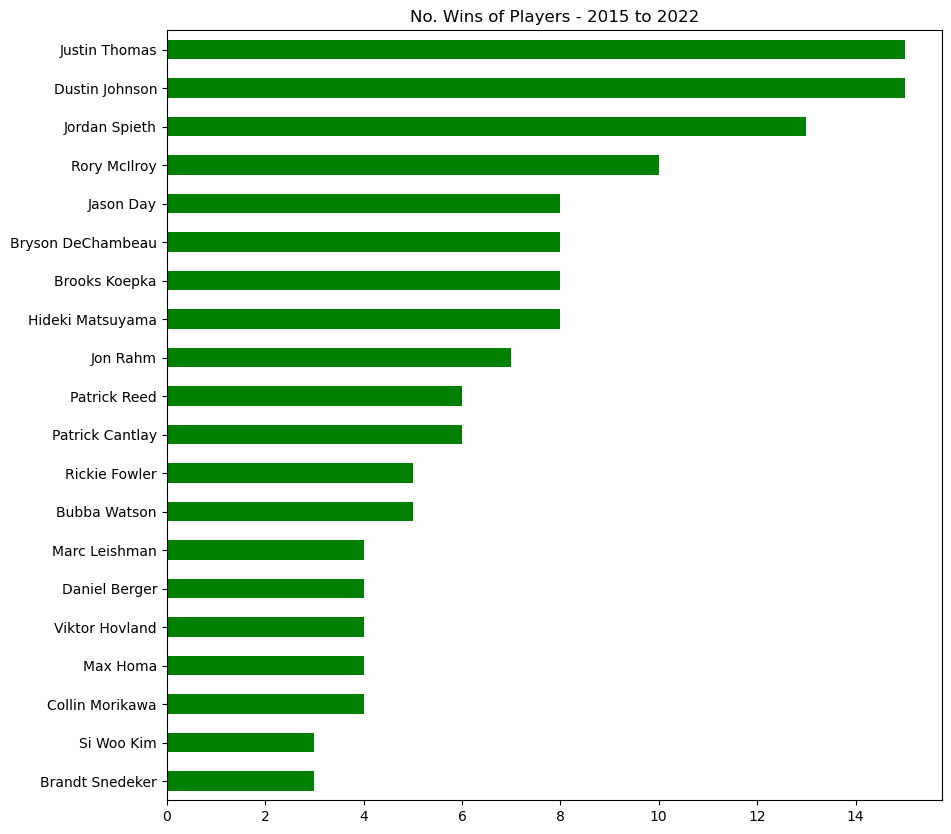

In [23]:
# Find player with most wins over the entire period and visualise with Horizontal bar chart
plt.figure(figsize=(10,10))
golf_stats.loc[golf_stats['pos'] == 1]['player'].value_counts().head(20).plot(kind = 'barh', color = 'g').invert_yaxis()
plt.title('No. Wins of Players - 2015 to 2022')
plt.show()

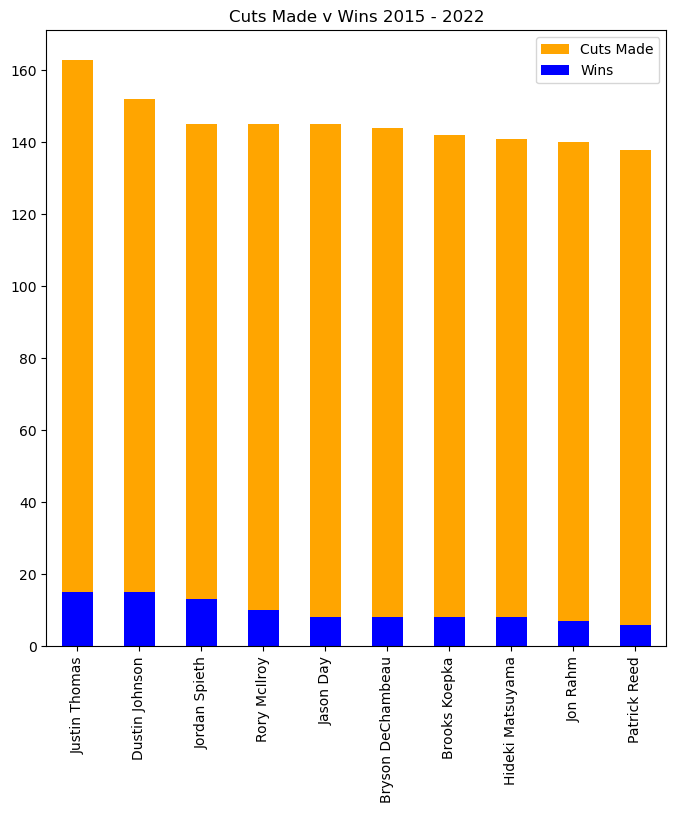

In [44]:
# Find player with most missed cuts over the entire period and visualise with Horizontal bar chart
plt.figure(figsize=(8,8))
golf_stats.loc[golf_stats['made_cut'] == 1]['player'].value_counts().head(10).plot(kind = 'bar', color = 'orange')
golf_stats.loc[golf_stats['pos'] == 1]['player'].value_counts().head(10).plot(kind = 'bar', color = 'b')
plt.title('Cuts Made v Wins 2015 - 2022')
plt.legend(["Cuts Made", "Wins"])
plt.show()


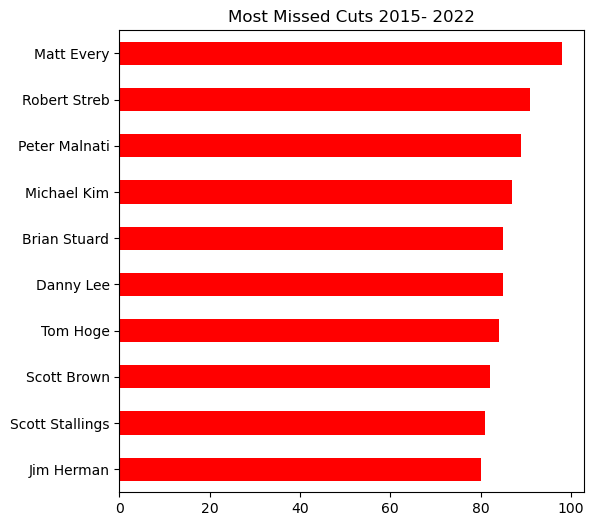

In [47]:
# Find player with most cuts made over the entire period and visualise with Horizontal bar chart
plt.figure(figsize=(6,6))
golf_stats.loc[golf_stats['made_cut'] == 0]['player'].value_counts().head(10).plot(kind = 'barh', color = 'r').invert_yaxis()
plt.title('Most Missed Cuts 2015- 2022')
plt.show()